In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STEP 1 - Import data and get all necessary descriptions from data like its shape, statistical descriptions and such
#There are two dataframes. The train data set and test data set. Usually when there's no test data set, we take 20 % from the train. We modify train first

df_train = pd.read_csv('C:/User/kgonzales21/Downloads/IE things/Datasets/House Price Prediction/train.csv')
df_test = pd.read_csv('C:/User/kgonzales21/Downloads/IE things/Datasets/House Price Prediction/test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [51]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [53]:
df_train['Fence'][0:5]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

C:\Users\win 10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

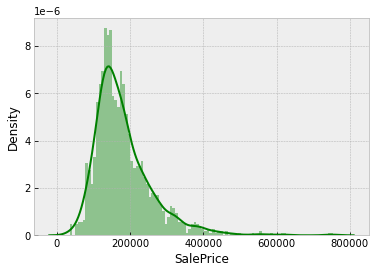

In [55]:
plt.style.use('bmh')
sns.distplot(df_train['SalePrice'], color = 'g',bins=100, hist_kws={'alpha': 0.4})

In [7]:
#STEP 2 - Identify if there are categorical data in your dataframe. We must separate numerical data from categorical data
#we are given with int, float and 0. We separate the 0 data columns (categorical) to the int and floaat (numerical)

list(set(df_train.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [13]:
#drops the ID column because it is not parat of data analysis

df_train = df_train.drop(labels = ["Id"],axis = 1)
df_numerical=df_train.select_dtypes(include=['int64','float64'])
df_numerical.head()

#we have 37/81 columns of numerical data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


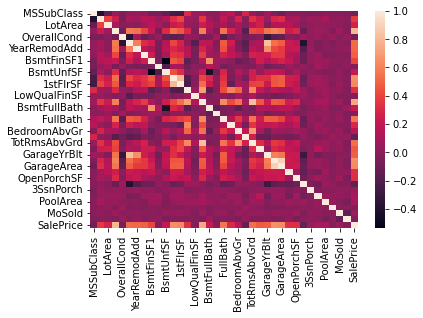

In [14]:
#STEP 3 - find correlataion between numerical data

corrmat = df_numerical.corr() #determines correlation
g = sns.heatmap(df_numerical.corr()) #visualizes correlation

#Our dependent variable is sales. Say we want only those varaiables who have a 55% and higher correlation with sales. We select them from the bunch

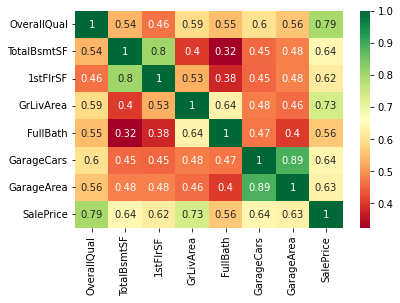

In [15]:
T_corr=corrmat.index[abs(corrmat['SalePrice'])>0.55]
g = sns.heatmap(df_numerical[T_corr].corr(),annot=True,cmap="RdYlGn")

#we conclude that overall quality, Total BS, 1stFIR, GrLiv, Garage cars, and Garage area affects the Sales

In [13]:
#STEP 4 - Categorical variables

df_cat=df_train.select_dtypes(include=['O']) #shows the columns with data type 0 (categorical)
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
df_cat.shape #43/81 columns of categorical variable

(1460, 43)

In [6]:
#STEP 5 - Finding and removing outliers visually

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x,
                        y = y,
                        mode = 'markers',
                        marker = dict(color = y, size=size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)
#scatter plot
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

#Going back, we knew that only a number of variables are affeecting sales, so we focus on them. We scatter plot them with sales individually to determine outliers
#Notice that outliers are those values beyond 4000, thus we remove them. Also in this case, we don't remove thoses that are higher than 700k. Thus our parameters are those outliers higher than 4000, and lesser than 300k

In [7]:
#STEP 5.1 - Remove outliers

df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [8]:
scatter_plot(df_train.TotalBsmtSF, df_train.SalePrice, 'TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

#outliers beyond 3000

In [9]:
df_train.drop(df_train[df_train.TotalBsmtSF>3000].index, inplace = True) #removing outliers without Y parameters
df_train.reset_index(drop = True, inplace = True)
scatter_plot(df_train.TotalBsmtSF, df_train.SalePrice, 'TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

In [29]:
df_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
')scatter_plot(df_train.GarageCars, df_train.SalePrice, 'GarageCars Vs SalePrice', 'GarageCars', 'SalePrice', 10, 'Cividis

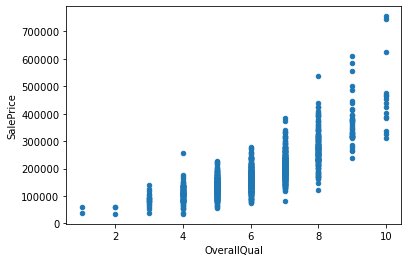

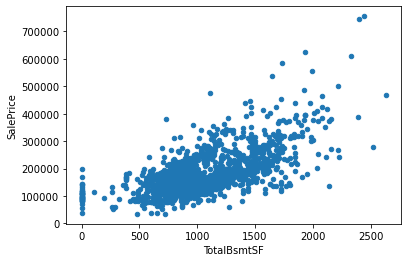

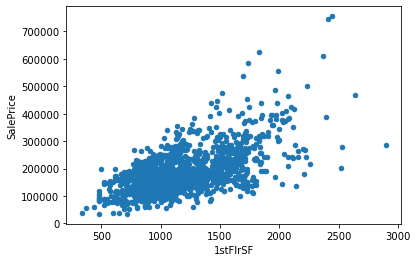

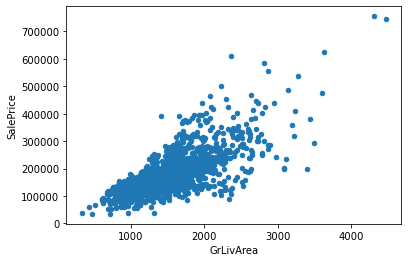

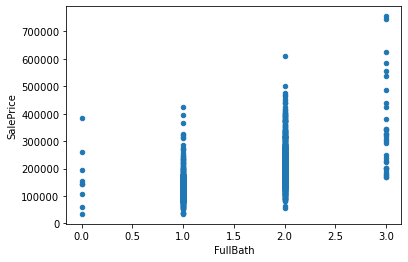

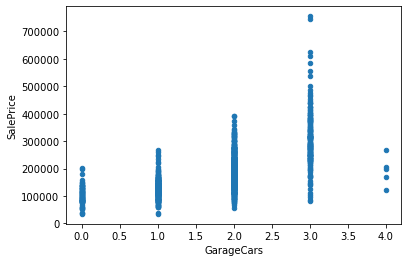

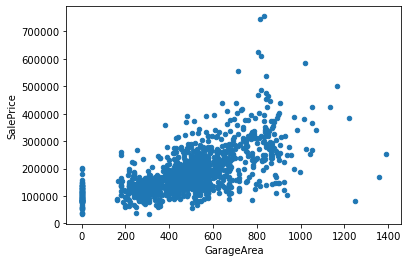

In [70]:
list1 = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea']
for i in list1:
    scatter_plots = df_train.plot(kind="scatter", x=i, y= 'SalePrice')
    scatter_plots
    

In [58]:
df_train_corr=corrmat.index[abs(corrmat['SalePrice'])>0.55]
list= np.array(df_train_corr)
list

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'], dtype=object)

In [72]:
#STEP 6 - Removing/handling missing values

missing_train=df_train.isnull().sum().sort_values(ascending=False) #shows how  many null values in each column
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) #percent of each each total of null values per column
missing_data_train=pd.concat([missing_train,percent],axis=1,keys=['missing','percent']) #joins missing_train and percent
missing_data_train.head(20)

#we can see that the first six have the most missing values ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','LotFrontage']

,missing,percent
PoolQC,1449,0.995876
MiscFeature,1401,0.962887
Alley,1364,0.937457
Fence,1174,0.806873
FireplaceQu,690,0.474227
LotFrontage,258,0.177320
GarageYrBlt,81,0.055670
GarageCond,81,0.055670
GarageType,81,0.055670
GarageFinish,81,0.055670


In [ ]:
df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','LotFrontage'], inplace=True) #drops all those columns with many null values

In [ ]:
df_train.shape #our train data has originally 79 columns. We are left with 74 columns having dropped 6 columns

In [76]:
df_test.shape

(1459, 80)

In [81]:
df_train.shape

(1455, 74)

In [86]:
#STEP 7 - Test data
#how many null values in each columns

missing_test=df_test.isnull().sum().sort_values(ascending=False)
percent_test=(df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test=pd.concat([missing_test,percent],axis=1,keys=['missing1','percent1'])
missing_data_test.head(25)

,missing1,percent1
PoolQC,1456.0,0.995876
MiscFeature,1408.0,0.962887
Alley,1352.0,0.937457
Fence,1169.0,0.806873
FireplaceQu,730.0,0.474227
LotFrontage,227.0,0.177320
GarageYrBlt,78.0,0.055670
GarageQual,78.0,0.055670
GarageFinish,78.0,0.055670
GarageCond,78.0,0.055670


In [ ]:
#drop columns with more than 100 numbers of null values

test_dropped = df_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu','LotFrontage'], inplace=True)
test_dropped.shape #dropped all theses columns

In [94]:
df_test.shape

(1459, 74)

In [95]:
print(df_train.shape, df_test.shape)

(1455, 74) (1459, 74)


In [96]:
#fill gaps

df_train.fillna(method ='ffill', inplace=True)
df_test.fillna(method ='ffill', inplace=True)


In [98]:
#STEP 8 - coding categorical variables in train data

df_cat=df_train.select_dtypes(include=['O'])
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [100]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [105]:
#coding proper

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df_cat.apply(le.fit_transform) 
df1.head(5)

#codes categorical variables into numbers

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [103]:
df_numerical=df_train.select_dtypes(include=['int64','float64'])
df_numerical.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [104]:
print(df_numerical.shape, df_cat.shape)

(1455, 36) (1455, 38)


In [106]:
#STEP 9 - concat numerical and categorical data in train data

data=pd.concat([df1, df_numerical], axis=1)
data.head(5)

#back to 74 columns

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


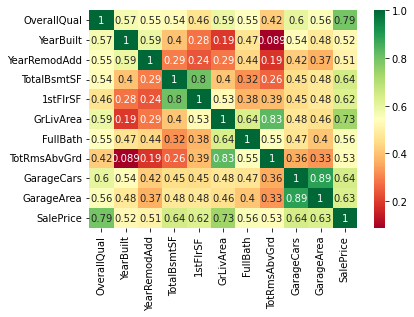

In [107]:
#STEP 10 - Correlation of new data (data with numerical and encoded categories)
#In this case, there is a condition of 50% and higher correlation

corrmat1 = data.corr()
T1_corr=corrmat.index[abs(corrmat['SalePrice'])>0.5]
g1 = sns.heatmap(data[T1_corr].corr(),annot=True,cmap="RdYlGn")

In [112]:
#STEP 11 - Regression analysis

#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#separates x and y of train data
x = data.iloc[:, :-1] #from column 1 to last column-1
y = data.iloc[:, -1] #last column
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=44, shuffle =True) #separates 20% of train data and made it test data

#X_train= 80% of the train data
#X_test+ 20% of the train data
#y_train= 80% of the train data to predict
#y_test= 20% of the train data to predict

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test)) #linear model of 20%
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.8976079361940281
Linear Regression Test Score is :  0.9033919801821053
Linear Regression Coef is :  [-1.16656902e+03  3.26338596e+04 -3.61517256e+02 -9.21105717e+02
 -3.42397304e+04 -5.61156453e+01 -5.17451625e+03  1.57748823e+01
  1.87629123e+02 -5.22590104e+01 -1.69261559e+03  5.10488949e+02
  8.50342441e+02  2.57201636e+03 -1.02094082e+03  3.48024934e+02
  8.73644053e+03 -9.13656965e+03 -1.32051529e+02  1.63482899e+03
 -9.30858726e+03  2.20075509e+03 -2.88888601e+03  3.64040505e+02
  1.24278058e+02  1.25309835e+03 -5.83476575e+02  3.49967694e+02
 -6.99845878e+02 -6.42296860e+03  4.69027029e+03  1.18250884e+03
  2.08471502e+02 -1.74183520e+03  3.29609811e+03  1.21025536e+03
 -8.94768050e+02  2.98508797e+03 -9.95743936e+01  5.78874275e-01
  8.33195562e+03  6.36418955e+03  2.36493276e+02 -8.77762170e+00
  4.13475543e+01  2.01907507e+01  4.57753366e+00 -3.25314929e+00
  2.15151351e+01  2.94227902e+01  2.55816644e+01 -1.35517333e+01
  4.14527212e+01 

In [115]:
print(df_train.shape, df_test.shape) #cleaned data

(1455, 74) (1459, 74)


In [119]:
#df_train data

X_test.shape + X_train.shape

#291+1164= number of original rows, still 73 columns

(291, 73, 1164, 73)

In [133]:
#Prediction proper

#Predicts test data (20%) of train data

y_pred_linear = LinearRegressionModel.predict(X_test) #291 X_test, 20%
print('Y predict: ',y_pred_linear[:5]) #291 y_pred_tes, 20%
print('Y test: ', y_test[:5]) #  train data has SalePrice column

Y predict:  [161514.40880869 123191.18637967 186494.54387291 199386.87707639
 152309.92593644]
Y test:  620     165150
1448     84500
315     188500
563     214000
404     150000
Name: SalePrice, dtype: int64


In [165]:
df_new = pd.DataFrame(y_pred_linear) #shows the predicted SalePrice of 20%
df_new1 = pd.DataFrame(y_test) #shows the SalePrice of 20%

In [167]:
df_train.tail(291)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1164,70,RL,13728,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,...,0,0,90,0,0,7,2008,WD,Normal,235000
1165,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,0,7,2006,WD,Normal,625000
1166,80,RL,9880,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,576,0,7,2008,WD,Normal,171000
1167,20,RL,9120,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,288,0,1400,11,2008,WD,Normal,163000
1168,160,FV,4017,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,3,2008,WD,Normal,171900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1451,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1452,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1453,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


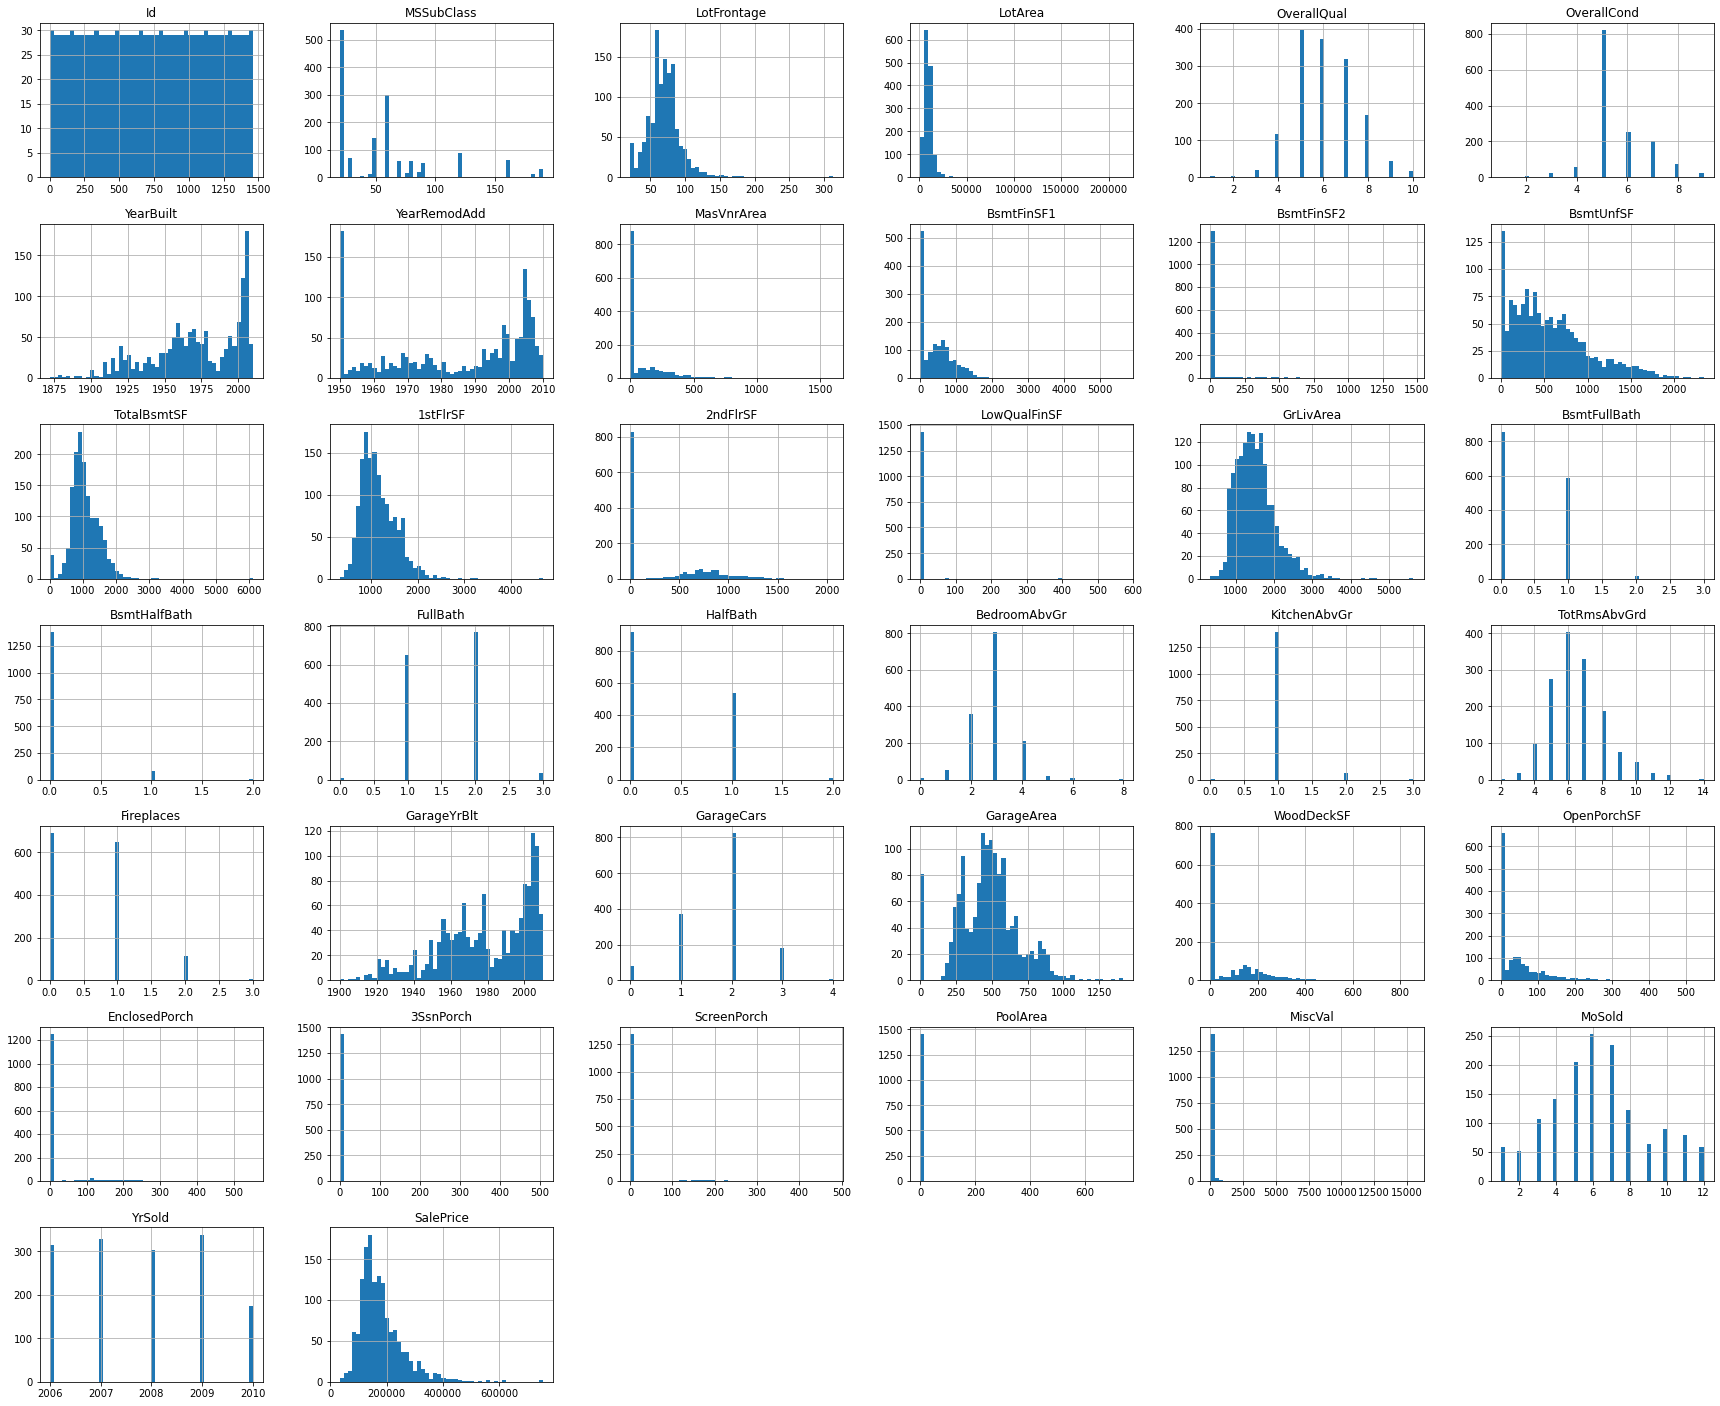

In [10]:
train = df_train.hist(bins=50, figsize=(30,25))

In [16]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive